In [2]:
import torch
from clip2latent import models
from PIL import Image

device = "cuda"
model_choices = {
    "faces": {
        "checkpoint": "https://huggingface.co/lambdalabs/clip2latent/resolve/main/ffhq-sg2-510.ckpt",
        "config": "https://huggingface.co/lambdalabs/clip2latent/resolve/main/ffhq-sg2-510.yaml",
        },
    "landscape": {
        "checkpoint": "https://huggingface.co/lambdalabs/clip2latent/resolve/main/lhq-sg3-410.ckpt",
        "config": "https://huggingface.co/lambdalabs/clip2latent/resolve/main/lhq-sg3-410.yaml",
    }
}

In [3]:
@torch.no_grad()
def infer(model, prompt, n_samples, scale, skips=250):
    images, clip_score = model(prompt, n_samples_per_txt=n_samples, cond_scale=scale, skips=skips, clip_sort=True)
    images = images.cpu()
    make_im = lambda x: (255*x.clamp(-1, 1)/2 + 127.5).to(torch.uint8).permute(1,2,0).numpy()
    images = [Image.fromarray(make_im(x)) for x in images]
    return images, clip_score

chosen_model = "faces"
checkpoint = model_choices[chosen_model]["checkpoint"]
cfg_file = model_choices[chosen_model]["config"]
model = models.Clip2StyleGAN(cfg_file, device, checkpoint)

In [4]:
outputs, clip_score = infer(model, 'a photograph of a happy person wearing sunglasses by the sea', 2, 2)

sampling loop time step: 100%|██████████| 4/4 [00:00<00:00, 52.51it/s]

Setting up PyTorch plugin "bias_act_plugin"... 

Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


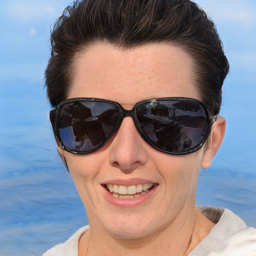

CLIP similarity score = 0.3440752327442169


In [5]:
display(outputs[0].resize((256, 256)))
print(f"CLIP similarity score = {clip_score[0].item()}")